Welcome to the first Jupyter Notebook of our class. This will show you the basics of Python, including working with **numpy**, **pandas**, and **matplotlib**.

***Challenge 1:*** Let's start with our first "challange". We need to load an image from a file, crop it, and display it.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load image
# /content/01.jpg
filepath = None # add path to file
image = cv2.imread(filepath)

Basic image manipulation.

In [ ]:
image.shape

(986, 1752, 3)

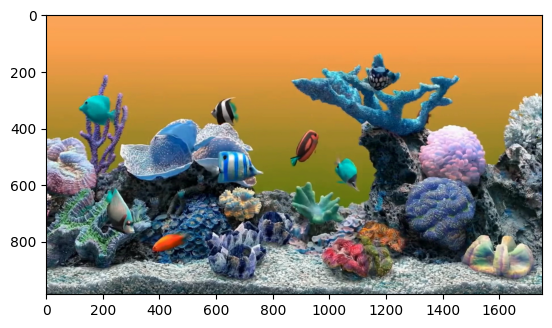

In [ ]:
plt.imshow(image)
plt.show()

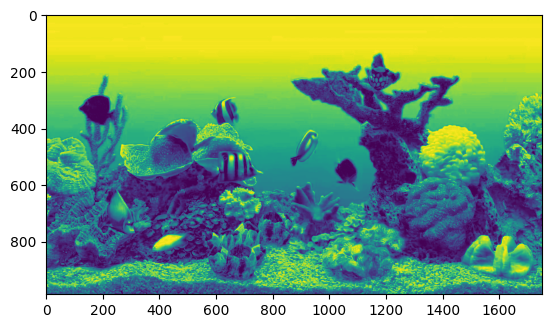

In [ ]:
plt.imshow(image[:,:,0])
plt.show()

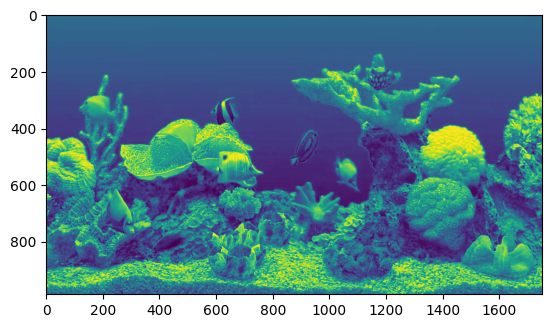

In [ ]:
plt.imshow(image[:, :, 2])
plt.show()

WARNING! numpy hates to copy data. It will avoid it as much as possible. This means that assigments create references to the same area in memory!

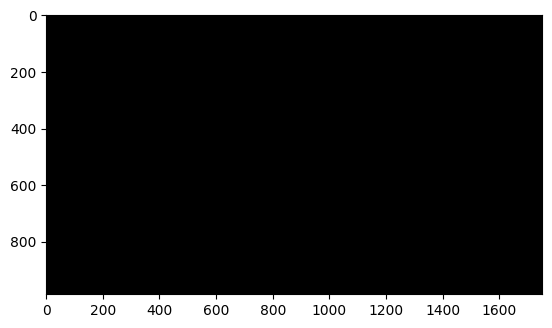

In [ ]:
image_copy = image
image_copy[:,:,:] = 0
plt.imshow(image_copy)
plt.show()

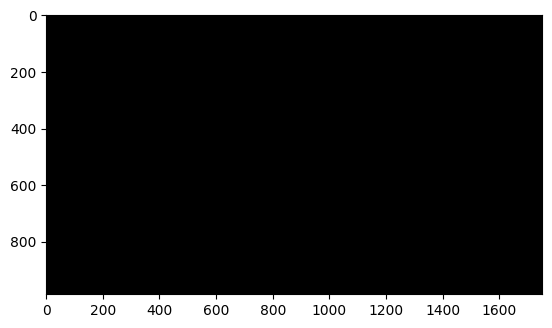

In [ ]:
plt.imshow(image)
plt.show()

If you want to copy an array, make sure you explicitly inform the interpreter that you want a copy by either recreating the array or by using a builtin method (copy)

In [ ]:
image_copy_2 = np.array(image)
image_copy_3 = image.copy()

In [ ]:
image_copy_2[:, :, 0] = 1
image_copy_3[:, :, :] = 50

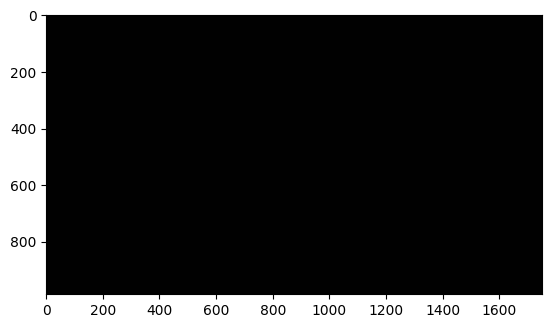

In [ ]:
plt.imshow(image_copy_2)
plt.show()

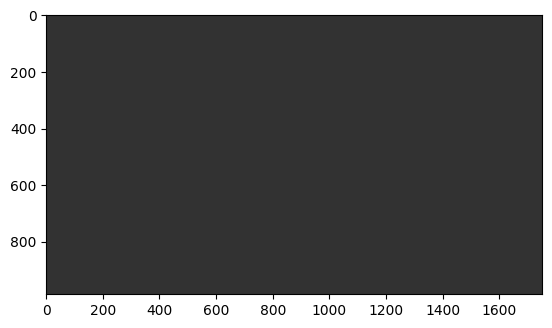

In [ ]:
plt.imshow(image_copy_3)
plt.show()

In [ ]:
image.shape

(986, 1752, 3)

In [ ]:
# Crop image
image = cv2.imread(filepath)

# Find the center of the image (index of the center point)
x0 = image.shape[1] // 2 # int(image.shape[1] / 2)
y0 = image.shape[0] // 2
print(f"Image center = {x0}, {y0}.")

top_left_x = x0 - 150
top_left_y = y0 - 150
bottom_right_x = x0 + 150
bottom_right_y = y0 + 150

cropped_image = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
print(f"Cropped image shape = {cropped_image.shape}")

Image center = 876, 493.
Cropped image shape = (300, 300, 3)


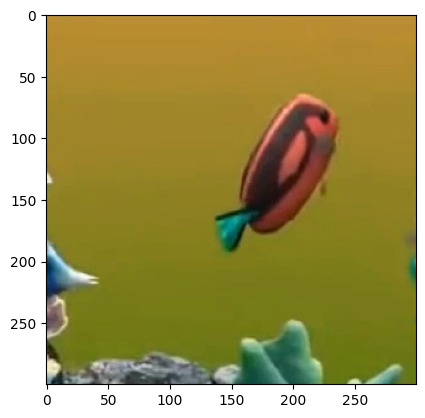

In [ ]:
# Display image
plt.imshow(cropped_image)
plt.show()

Functions and images

In [ ]:
def func(x, y):
  return x**2 + y**2

func(1, 1), func(2, 2)

(2, 8)

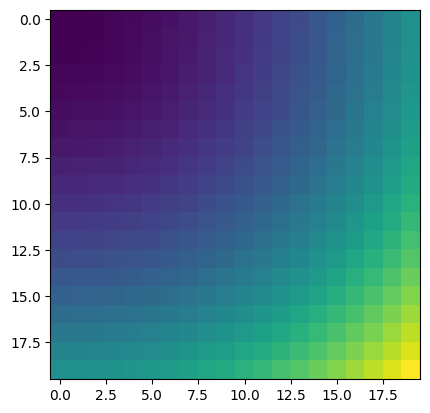

In [ ]:
x = np.arange(20)
y = np.arange(20)
z = np.zeros((20, 20))
for xi in x:
  for yi in y:
    zi = func(xi, yi)
    z[xi, yi] = zi

plt.imshow(z)
plt.show()

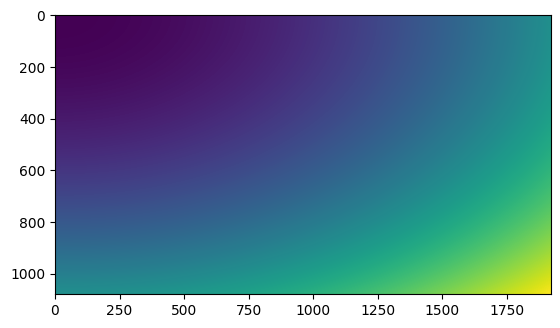

In [ ]:
x = np.linspace(0, 20, 1080)
y = np.linspace(0, 20, 1920)
z = np.zeros((1080, 1920))
for i in range(len(x)):
  for j in range(len(y)):
    zi = func(x[i], y[j])
    z[i, j] = zi

plt.imshow(z)
plt.show()

In [ ]:
print(f"Number of pixels: {z.shape[0] * z.shape[1]}")

Number of pixels: 1166400


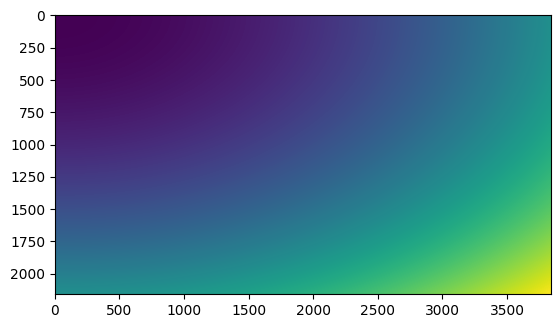

In [ ]:
x = np.linspace(0, 20, 2160)
y = np.linspace(0, 20, 3840)
z = np.zeros((2160, 3840))
for i in range(len(x)):
  for j in range(len(y)):
    zi = func(x[i], y[j])
    z[i, j] = zi

plt.imshow(z)
plt.show()

Objects and images

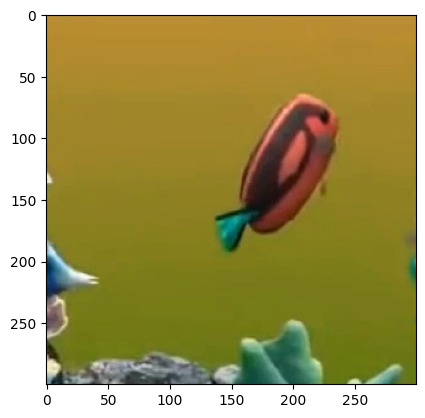

In [ ]:
plt.imshow(cropped_image)
plt.show()

In [ ]:
def to_grayscale(image):
  image = image.astype(float)
  gray_image = np.zeros((image.shape[0], image.shape[1]))
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      gray_image[i, j] = (image[i, j, 0] + image[i, j, 1] + image[i, j, 2]) // 3
  return gray_image



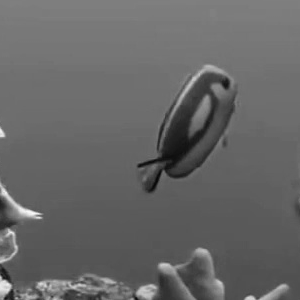

In [ ]:
from google.colab.patches import cv2_imshow
gray = to_grayscale(cropped_image)
cv2_imshow(gray)
plt.show()

In [ ]:
def df_dx(image, step=1):
  dfdx = np.zeros((image.shape[0], image.shape[1]))
  for j in range(image.shape[0]):
    for i in range(image.shape[1]-step):
      dfdx[j, i] = (image[j, i+step] - image[j, i]) / step
  return dfdx

def df_dy(image, step=1):
  dfdy = np.zeros((image.shape[0], image.shape[1]))
  for j in range(image.shape[0]-step):
    for i in range(image.shape[1]):
      dfdy[j, i] = (image[j+step, i] - image[j, i]) / step
  return dfdy

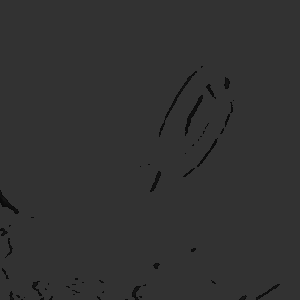

In [ ]:
gray_dx = df_dx(gray, step=5)
gray_dx[gray_dx < 10] = 50
cv2_imshow(gray_dx)
plt.show()

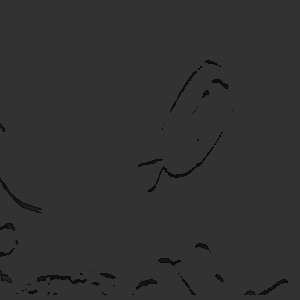

In [ ]:
gray_dy = df_dy(gray, step=5)
gray_dy[gray_dy < 10] = 50
cv2_imshow(gray_dy)
plt.show()

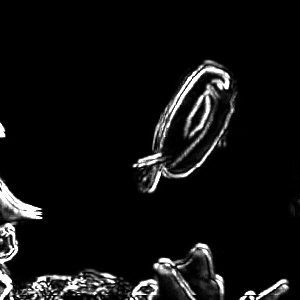

In [ ]:
def grad(image, step=1):
  dfdx = df_dx(image, step)
  dfdy = df_dy(image, step)

  g = np.zeros(image.shape)
  for i in range(g.shape[0]):
    for j in range(g.shape[1]):
      g[i, j] = dfdx[i, j]**2 + dfdy[i, j]**2

  return g

gray_g = grad(gray, step=5)
cv2_imshow(gray_g)
plt.show()

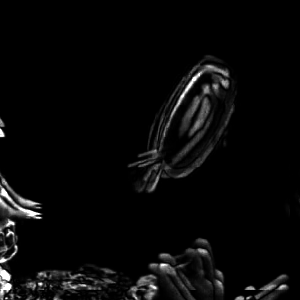

In [ ]:
gray_g = grad(gray, step=10)
cv2_imshow(gray_g)
plt.show()